## Violent Crimes and Unemployment Correlation
##### Will a rise or decline in unemployment cause a corresponding rise or decline in number of (violent) crimes reported?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('crimebystatecombinedwithunemployment.csv')

In [3]:
df.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2


In [4]:
#df.info()

In [5]:
#df.isnull().sum()

In [6]:
df['property crimes'] = df['Burglary'] + df['Larceny theft'] + df['vehicle theft']

In [7]:
df['violent crimes'] = df['Murder'] + df['rape'] + df['Robbery'] + df['Aggravated assault']

In [8]:
df.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft,property crimes,violent crimes
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3,3419.5,388.8
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7,3298.1,414.5
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5,3519.7,419.1
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1,3830.6,413.3
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2,4485.1,448.5


###### violent crimes and violent total are very highly correlated. same with poperty total and property crimes. so we can conclude that: 
###### df['violent total'] = df['Murder'] + df['rape'] + df['Robbery'] + df['Aggravated assault'], and 
###### df['property total'] = df['Burglary'] + df['Larceny theft'] + df['vehicle theft'].
###### So we can drop unnecassary columns


In [9]:
df1 = df.drop(columns=['violent crimes', 'Burglary', 'Larceny theft', 'vehicle theft', 'property total', 'property crimes'])

In [10]:
df1.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2


In [11]:
df1.corr()

,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
unemployment,1.000000,-0.130315,0.152197,0.187683,0.217002,0.060251,0.205743,0.139080
year,-0.130315,1.000000,0.107086,-0.075082,-0.188184,0.027375,-0.151634,0.000828
Population,0.152197,0.107086,1.000000,0.227709,0.057036,-0.033619,0.243441,0.191644
violent total,0.187683,-0.075082,0.227709,1.000000,0.827322,0.470626,0.898216,0.923528
Murder,0.217002,-0.188184,0.057036,0.827322,1.000000,0.267419,0.808561,0.702857
rape,0.060251,0.027375,-0.033619,0.470626,0.267419,1.000000,0.289249,0.495360
Robbery,0.205743,-0.151634,0.243441,0.898216,0.808561,0.289249,1.000000,0.663790
Aggravated assault,0.139080,0.000828,0.191644,0.923528,0.702857,0.495360,0.663790,1.000000


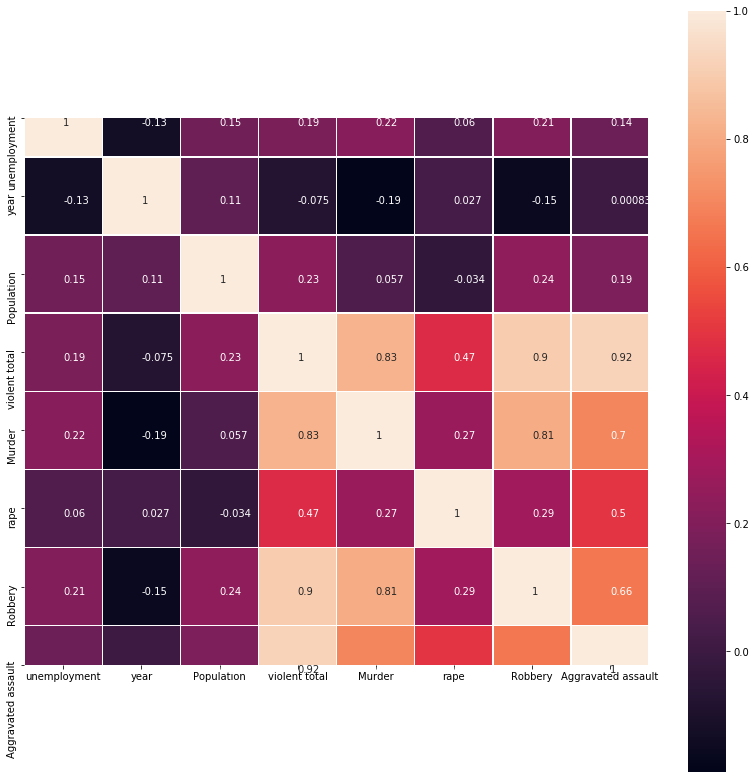

In [12]:
plt.figure(figsize=(14, 14))
akws = {"ha": 'left',"va": 'top'}
# annot_kws={'size':8}
sns.heatmap(df1.corr(), annot = True, annot_kws=akws, linewidths=0.35,square=True)

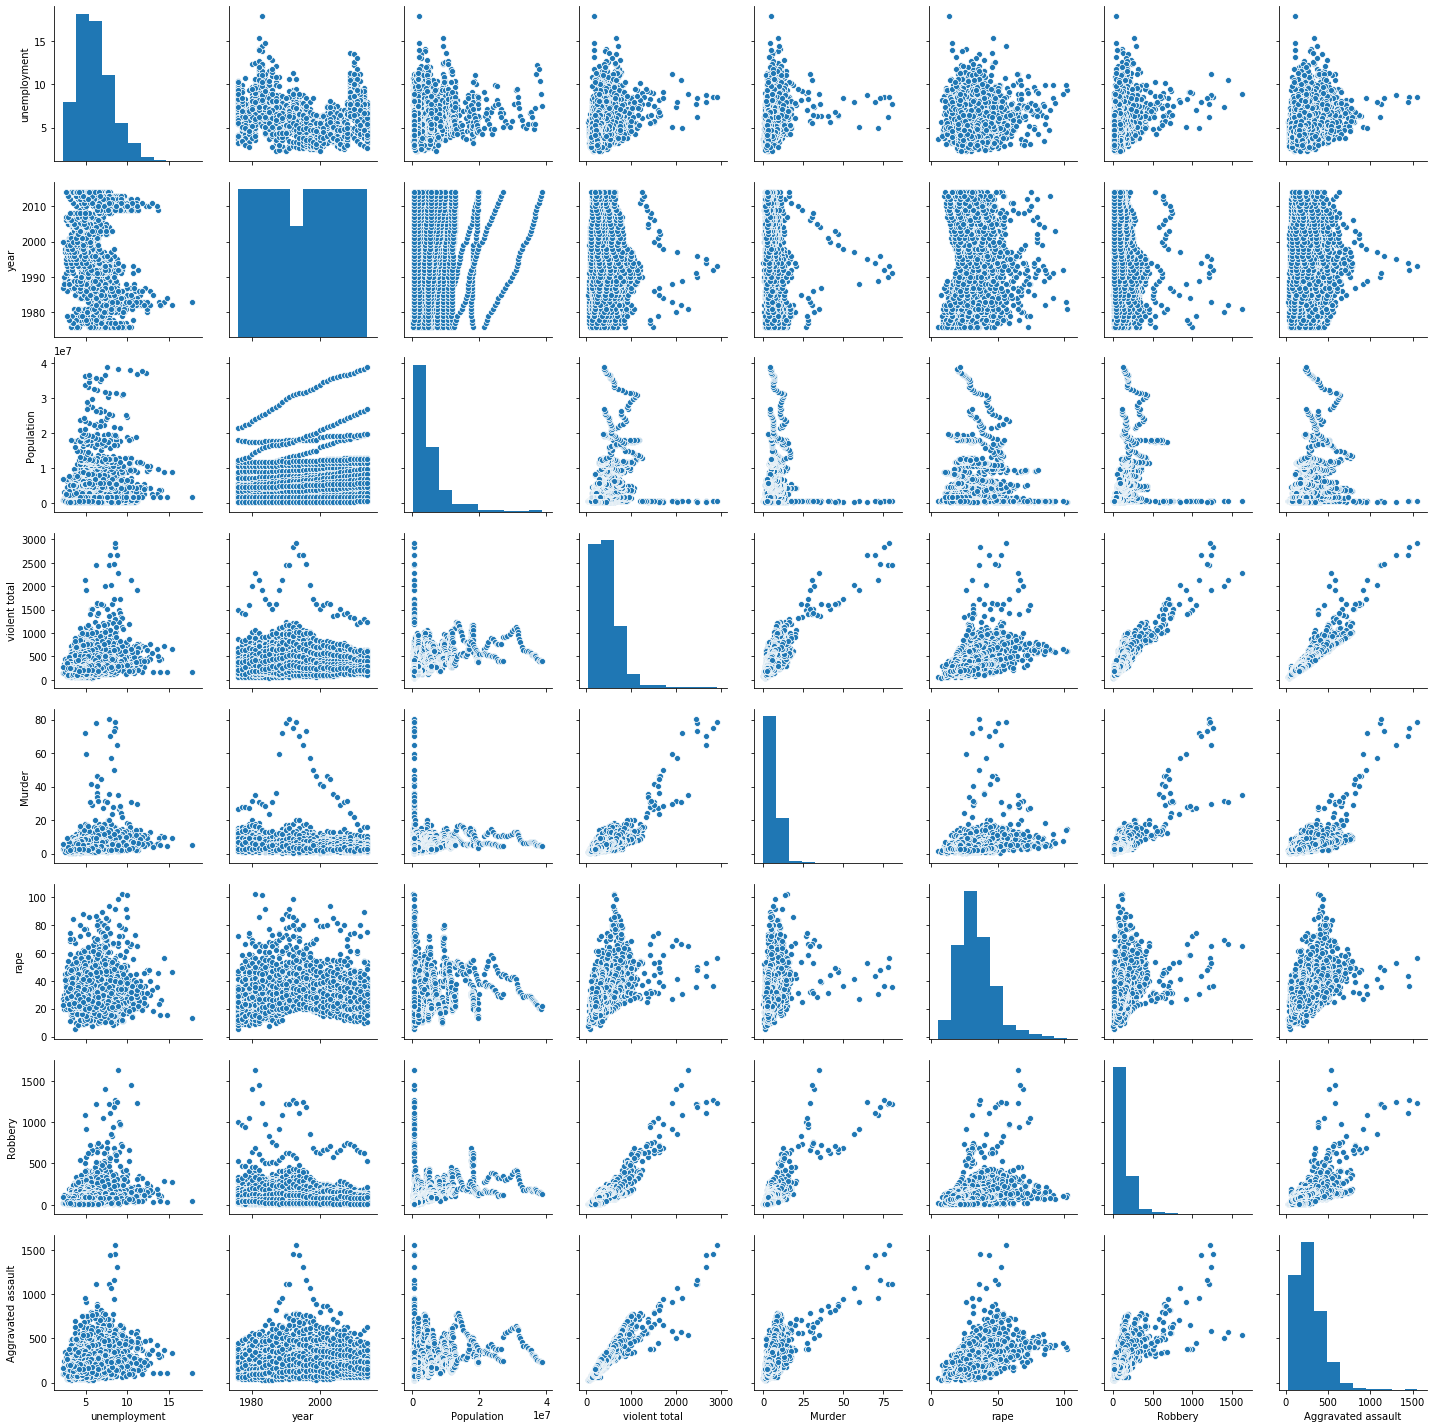

In [13]:
sns.pairplot(df1)

In [14]:
#df2 = df1.groupby('state', as_index=False).sum()
#df2.head()

###### Lets do a scatter plot of each violent crime against unemployment to get a clearer picture:

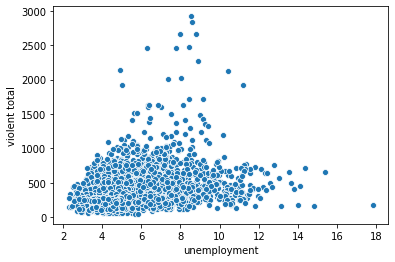

In [15]:
sns.scatterplot(data = df1, x= 'unemployment', y= 'violent total')

In [16]:
np.corrcoef(df['unemployment'], df['violent total'])

array([[1.        , 0.18768275],
       [0.18768275, 1.        ]])

###### There's a very weak corellation between violent crimes and unemployment

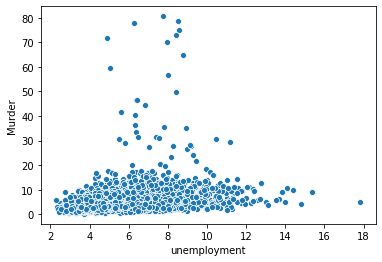

In [17]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Murder')#, marker = '*')

In [18]:
np.corrcoef(df['unemployment'], df['Murder'])

array([[1.        , 0.21700158],
       [0.21700158, 1.        ]])

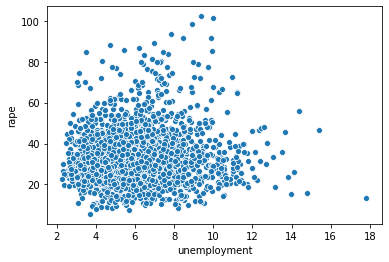

In [49]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'rape')

In [50]:
np.corrcoef(df['unemployment'], df['rape'])

array([[1.        , 0.06025147],
       [0.06025147, 1.        ]])

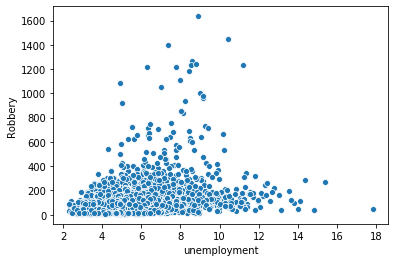

In [19]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Robbery')

In [20]:
np.corrcoef(df['unemployment'], df['Robbery'])

array([[1.        , 0.20574281],
       [0.20574281, 1.        ]])

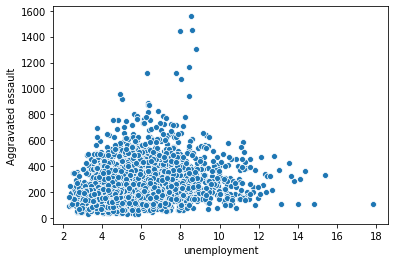

In [21]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Aggravated assault')

In [22]:
np.corrcoef(df['unemployment'], df['Aggravated assault'])

array([[1.        , 0.13907966],
       [0.13907966, 1.        ]])

###### So far, we've seen very weak correlations between unemployment and crime. Let's pick a few years at random and loot at the relationship between crime and unemployment in those years

In [23]:
df_year = df1['year'].sample(5)
df_year

325     1989
758     1993
1841    1984
1013    2014
1324    2013
Name: year, dtype: int64

###### please note that at the time of runnng this code, the result of df_year=1989, 1993, 1984, 2014 and 2013. You will most likely get a different result when runnng the above code cell because the years are chosen at random

In [70]:
df_89 = df1[df.year==1989]
df_89.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
13,AL,7.042,1989,4118000,590.8,10.2,31.0,133.9,415.7
52,AK,7.033,1989,527000,497.7,8.0,52.9,67.6,369.3
91,AZ,5.333,1989,3556000,599.6,6.7,36.2,139.0,417.7
130,AR,6.983,1989,2406000,473.7,8.4,38.4,110.6,316.3
169,CA,5.117,1989,29063000,977.7,10.9,41.2,331.8,593.8


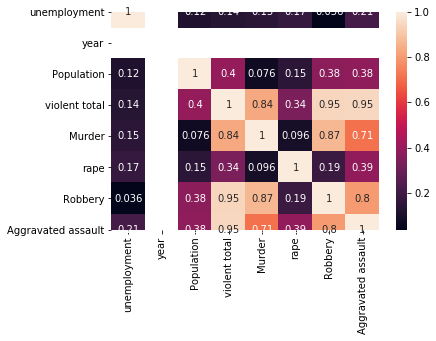

In [71]:
sns.heatmap(df_89.corr(), annot=True)

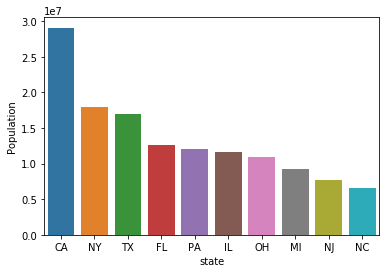

In [72]:
sns.barplot(x='state', y = 'Population', data =df_89.sort_values(by=['Population'], ascending=False).head(10))

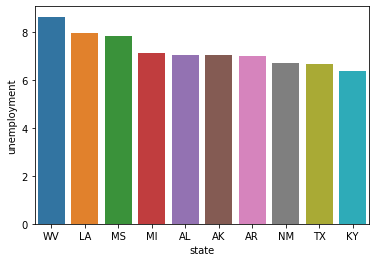

In [73]:
sns.barplot(x='state', y = 'unemployment', data =df_89.sort_values(by=['unemployment'], ascending=False).head(10))

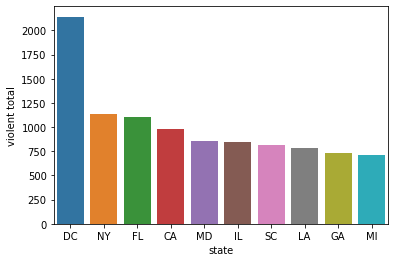

In [74]:
sns.barplot(x='state', y = 'violent total', data =df_89.sort_values(by=['violent total'], ascending=False).head(10))

###### For the year 1989, WV(West Virginia ), which is the state with the highest unemployment rate, does not appear in the top 10 states in violence. DC(Washington DC ), however, which is not in the top 10 uneployment rank, comes first in violence

In [75]:
df_93 = df1[df.year==1993]
df_93.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
17,AL,7.333,1993,4187000,780.4,11.6,35.1,159.5,574.3
56,AK,7.692,1993,599000,760.8,9.0,83.8,122.4,545.6
95,AZ,6.408,1993,3936000,715.0,8.6,37.8,162.9,505.7
134,AR,6.158,1993,2424000,593.3,10.2,42.4,124.9,415.8
173,CA,9.467,1993,31211000,1077.8,13.1,37.7,405.1,621.8


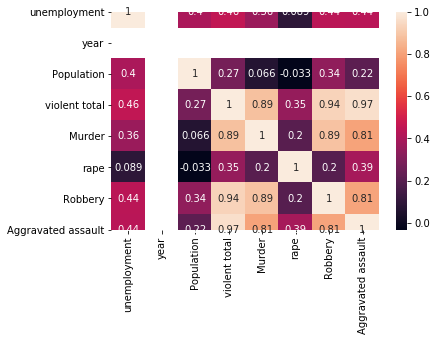

In [76]:
sns.heatmap(df_93.corr(), annot=True)

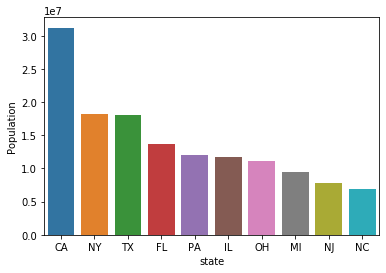

In [77]:
sns.barplot(x='state', y = 'Population', data =df_93.sort_values(by=['Population'], ascending=False).head(10))

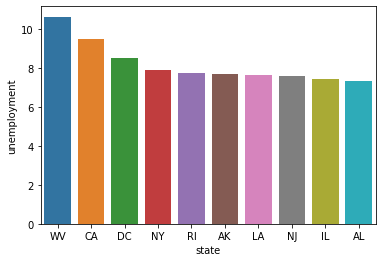

In [78]:
sns.barplot(x='state', y = 'unemployment', data =df_93.sort_values(by=['unemployment'], ascending=False).head(10))

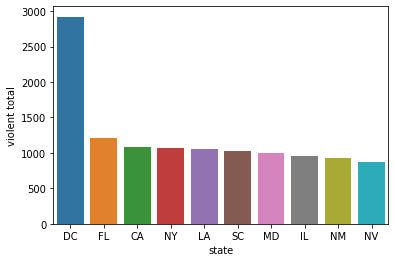

In [79]:
sns.barplot(x='state', y = 'violent total', data =df_93.sort_values(by=['violent total'], ascending=False).head(10))

In [80]:
df_93.corr()

,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
unemployment,1.000000,NaN,0.403940,0.457946,0.362912,0.088538,0.441539,0.438444
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,0.403940,NaN,1.000000,0.274657,0.065516,-0.032780,0.340966,0.216968
violent total,0.457946,NaN,0.274657,1.000000,0.886406,0.351329,0.935217,0.966324
Murder,0.362912,NaN,0.065516,0.886406,1.000000,0.202608,0.890509,0.807470
rape,0.088538,NaN,-0.032780,0.351329,0.202608,1.000000,0.200621,0.391494
Robbery,0.441539,NaN,0.340966,0.935217,0.890509,0.200621,1.000000,0.814268
Aggravated assault,0.438444,NaN,0.216968,0.966324,0.807470,0.391494,0.814268,1.000000


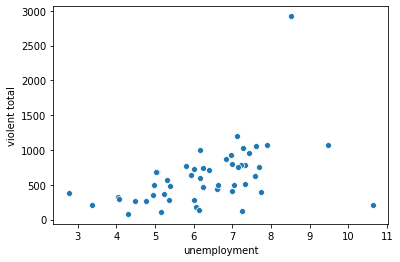

In [95]:
sns.scatterplot(data = df_93,  x= 'unemployment', y = 'violent total')

In [96]:
np.corrcoef(df_93['unemployment'], df_93['violent total'])

array([[1.        , 0.45794597],
       [0.45794597, 1.        ]])

######  For 1993, again, WV (West Virginia) has the highest unemployment rate, but is not in the top 10 in violence rates. However, DC (Washington DC ), NY(New York), CA(California), LA (Louisiana) and IL(Illinois) all appear in top 10 unemployment and violence rates. But we can't conclude that unemployment is the cause of high violence rates in these staes as the correlation between unemployment and crimes is still weak(about 0.457) as seen above

In [83]:
df_84 = df1[df.year==1984]
df_84.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
8,AL,11.008,1984,3990000,431.2,9.4,25.1,96.1,300.6
47,AK,9.867,1984,500000,621.6,11.6,91.6,109.4,409.0
86,AZ,5.192,1984,3053000,516.1,7.8,43.1,131.1,334.1
125,AR,8.725,1984,2349000,321.4,7.5,29.7,67.6,216.6
164,CA,7.767,1984,25622000,763.4,10.6,45.7,327.5,379.5


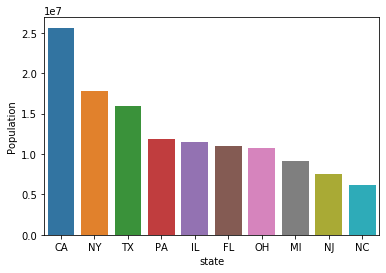

In [84]:
sns.barplot(x='state', y = 'Population', data =df_84.sort_values(by=['Population'], ascending=False).head(10))

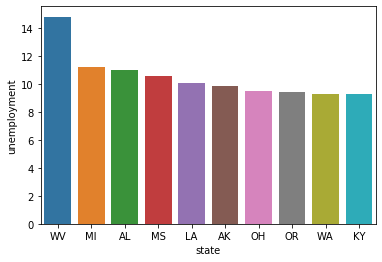

In [85]:
sns.barplot(x='state', y = 'unemployment', data =df_84.sort_values(by=['unemployment'], ascending=False).head(10))

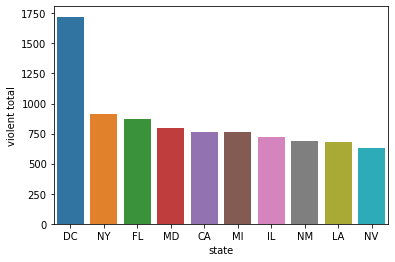

In [86]:
sns.barplot(x='state', y = 'violent total', data =df_84.sort_values(by=['violent total'], ascending=False).head(10))

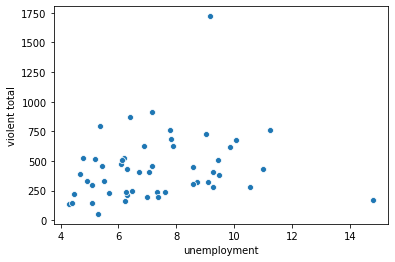

In [97]:
sns.scatterplot(data = df_84,  x= 'unemployment', y = 'violent total')

In [98]:
np.corrcoef(df_84['unemployment'], df_93['violent total'])

array([[1.        , 0.20673964],
       [0.20673964, 1.        ]])

###### For  1984, apart from LA(Louisiana) which is the 5th highest in unemployment and 9th highest in violent crimes, every other state in the top 10 unemployment plot, do not appear in the violent total plot. Interestingly, WV (West Virginia) again, just like the other years we have explored ranks highest in unemployent, but does not fall into top 10 in violence. DC(Washington DC) on the other hand, just like other years e have explored comes top in violence, but it's not in top 10 of the unemployment plot

In [87]:
df_2014 = df1[df.year==2014]
df_2014.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
38,AL,6.783,2014,4849377,427.4,5.7,29.6,96.9,283.4
77,AK,6.875,2014,736732,635.8,5.6,75.3,85.4,440.2
116,AZ,6.783,2014,6731484,399.9,4.7,36.6,92.8,252.1
155,AR,6.025,2014,2966369,480.1,5.6,39.8,69.1,346.0
194,CA,7.500,2014,38802500,396.1,4.4,21.6,125.5,236.6


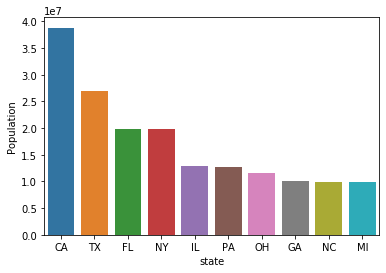

In [88]:
sns.barplot(x='state', y = 'Population', data =df_2014.sort_values(by=['Population'], ascending=False).head(10))

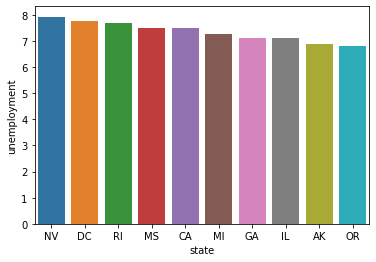

In [89]:
sns.barplot(x='state', y = 'unemployment', data =df_2014.sort_values(by=['unemployment'], ascending=False).head(10))

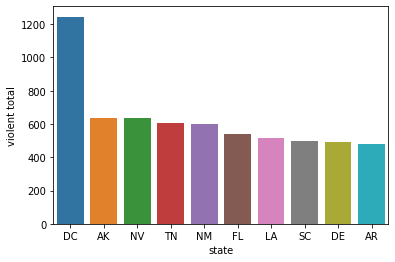

In [90]:
sns.barplot(x='state', y = 'violent total', data =df_2014.sort_values(by=['violent total'], ascending=False).head(10))

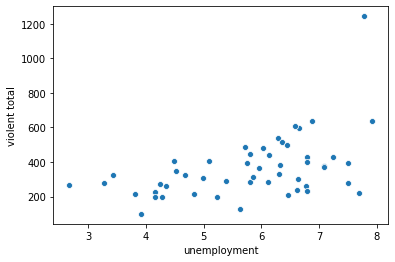

In [99]:
sns.scatterplot(data = df_2014,  x= 'unemployment', y = 'violent total')

In [100]:
np.corrcoef(df_84['unemployment'], df_2014['violent total'])

array([[1.       , 0.2744164],
       [0.2744164, 1.       ]])

###### For 2014, DC (Washington DC) is 2nd highest in unemployment, and highest in violence. Every other state in top 10 unemployment does not appear in top 10 violence

In [101]:
df_2013 =df1[df.year==2013]
df_2013.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault
37,AL,7.217,2013,4833996,431.0,7.2,30.0,96.1,285.2
76,AK,6.992,2013,737259,638.7,4.6,89.1,84.5,424.1
115,AZ,7.767,2013,6634997,415.6,5.4,35.3,100.3,262.1
154,AR,7.250,2013,2958765,463.2,5.3,38.4,76.4,331.1
193,CA,8.933,2013,38431393,402.6,4.5,19.4,139.6,231.7


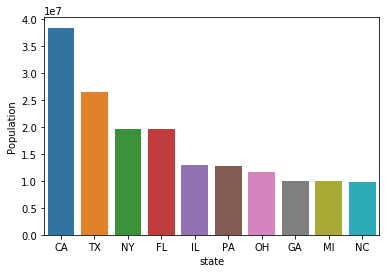

In [102]:
sns.barplot(x='state', y = 'Population', data =df_2013.sort_values(by=['Population'], ascending=False).head(10))

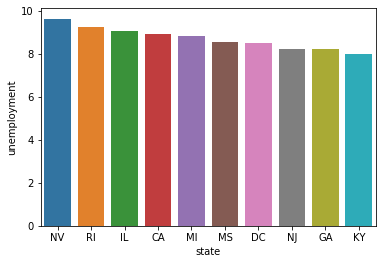

In [103]:
sns.barplot(x='state', y = 'unemployment', data =df_2013.sort_values(by=['unemployment'], ascending=False).head(10))

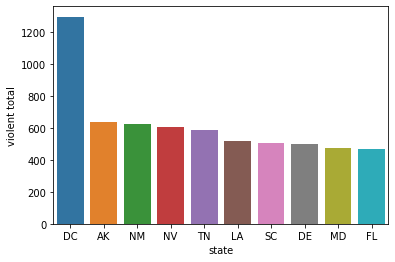

In [104]:
sns.barplot(x='state', y = 'violent total', data =df_2013.sort_values(by=['violent total'], ascending=False).head(10))

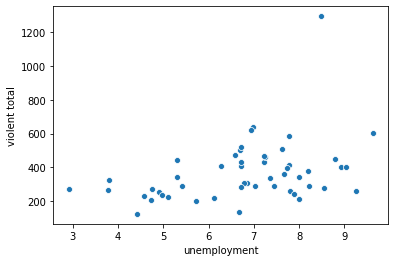

In [110]:
sns.scatterplot(data = df_2013,  x= 'unemployment', y = 'violent total')

In [124]:
np.corrcoef(df_84['unemployment'], df_2013['violent total'])

array([[1.        , 0.26909984],
       [0.26909984, 1.        ]])

In [123]:
dc = df1[df.state=='DC']

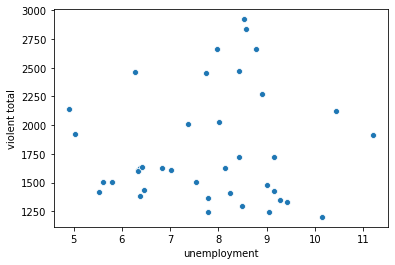

In [125]:
sns.scatterplot(data = dc,  x= 'unemployment', y = 'violent total')

In [122]:
np.corrcoef(dc['unemployment'], dc['violent total'])

array([[1.        , 0.06681419],
       [0.06681419, 1.        ]])

In [126]:
nv = df1[df.state=='NV']

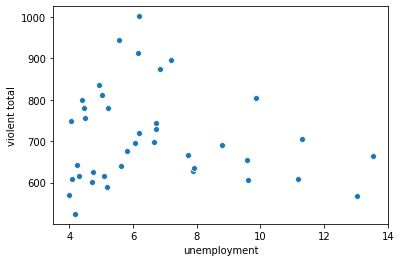

In [127]:
sns.scatterplot(data = nv,  x= 'unemployment', y = 'violent total')

In [128]:
np.corrcoef(nv['unemployment'], nv['violent total'])

array([[ 1.        , -0.11615828],
       [-0.11615828,  1.        ]])

###### For 2013, NV (Nevada) is the state with the highest unemployment rate, and 4th highest violence rate. DC(Washington DC) is the highest in violence crimes and the 7th higest in unemployment.  A closer look at these 2 states shows no correlation between crime and unemployment

In [63]:
#ca=carlifonia, tx=texas, florida=fl, ny=newyork, il=illinois, pa=pennsylvania, oh=ohio, ga=georgia, nc=north carolina, mi=ichigan
#wv=west virginia, nv=Nevada

#### A detailed exploration of the dataset shows very weak correlations unemployment and violent crimes. So we can conclude that a rise or decline in unemployment does not cause a rise or decline in violent crimes.